# 语音和语音识别介绍

语音是AI领域最重要的分支之一，声音是人与自然接收信息的重要渠道，语音作为人与人交流的重要媒介，对于语音的研究是很重要和必要的。

AI的三大领域研究对象：计算机视觉（图像）、自然语言处理（文本）、语音（音频）

![1.jpg](./img/1.jpg)


## 音频特征

声音从本质来看是声波，可以作为一种信号来进行处理，称为音频信号。

与图像等相同，需要经过把非结构化数据转化成结构化数据，并提取出有用的特征，以便后续的分析处理。

与图像等不同的是，音频信号是一维的序列数据，不能直接采用图像的形式进行处理，需要有领域内特定的处理方法。

梅尔频率倒谱系数（MFCC，Mel-frequency cepstral coefficients） 是声音处理领域最常见的声音特征，MFCC 是基于人耳听觉特性提出来的，与频率成非线性对应关系,是一种非常有效的特征提取方法。

MFCC 提取步骤主要是：

`预加重——>分帧——>加窗——>快速傅里叶变换（FFT）——>梅尔滤波器组——>离散余弦变换（DCT）`

其中快速傅里叶变换（FFT）与梅尔滤波器组是 MFCC 最重要的部分。

然而，DCT变换会损失声音的结构信息，因此MFCC在深度模型中性能不是很好。

随着深度学习的发展，受限的玻尔兹曼机（RBM）、卷积神经网络（CNN）、CNN-LSTM-DNN（CLDNN）等深度神经网络模型作为一个直接学习滤波器代替梅尔滤波器组被用于自动学习的语音特征提取中，并取得良好的效果。


## 音频数据

语音领域的音频开源数据集，大部分在[**openslr**](http://www.openslr.org/index.html)都可以下载使用。常用的有：
- LibriSpeech ASR corpus：包含大约1000小时的英语语音的大型语料库，这些数据来自LibriVox项目的有声读物。
- AISHELL-1：中文，包含178小时的开源版数据，内容涉及智能家居、无人驾驶、工业生产等11个领域。
- THCHS-30：中文，，总时长超过30个小时，大部分参与录音的人员是会说流利普通话的大学生。
- Primewords：中文，包含了大约100小时的中文语音数据，语料库由296名母语为英语的人使用智能手机录制。

![](./img/2.png)

此外，还有有一些其他常用音频开源数据集，如：
- 音乐相关的集，比如Million Song Dataset和MusicNet
- 环境声相关的最大数据集AudioSet，超过200万个音频片段


## 常见任务

- **音频分类**

    音频分类是语音领域的基本任务，从本质上说，它就是从音频中提取特征，然后判断具体属于哪一类。

    最简单的应用如：区分不同动物的叫声；区分男性和女性的声音

    复杂一些的应用有：音乐曲风分类

    音频分类可以包含多个类别，一个音频可以同时属于不同类，也就是有多个标签。


- **音频分割**

   音频分割同样是语音领域的基础任务，根据定义的一组特征将音频样本分割成段。

   音频分割是一个重要的预处理步骤，通过它，我们可以将一个嘈杂而冗长的音频信号分割成短小、均匀的段落，再进行序列建模。

  目前音频分割的一个应用是心音分割，即识别心脏的特定信号，帮助诊断心血管疾病。


- **音频指纹识别**

  音频指纹识别的目的是从音频中提取一段特定的数字特征，用于快速识别该段音频是否来自音频样本，或从音频库中搜索出带有相同数字特征的音频。

  听歌识曲的功能就是使用最广泛的音频指纹识别应用


- **声源分离**

  指的是在多声源混合的信号中提取单一的目标声源。

  常见的应用之一就是识别同时翻译音乐中的歌词。


- **声音增强**

  通常为语音增强，指的是通过减小噪声来提高语音质量。

  通过语音增强可以有效抑制各种干扰信号，增强目标语音信号，如通话或对讲时使语言更清晰。


- **语音合成**

  根据数据集中的声音属性特征来生成新的数据。

  语音合成主要采用波形拼接合成和统计参数合成两种方式。

  波形拼接语音合成需要有足够的高质量发音人录音才能够合成高质量的语音，在工业界中有广泛应用。

  统计参数语音合成虽然整体合成质量略低，但是在发音人语料规模有限的条件下，优势更为明显。


- **定位和跟踪**

  利用多通道信号可以对声源位置进行跟踪和定位。

  跟踪和定位的主要设备条件是麦克风阵列，采集的信号一般是多通道的。

  定位和跟踪相关的应用包括监控、智能家居、智能会议室等。


- **音乐信息检索**

  这是音频处理中最困难的任务之一，实质上相当于建立一个基于音频数据的搜索引擎。

  音乐相关任务通常包含低级分析（起始和偏移检测，基频估计），节奏分析（节拍跟踪，仪表识别，下拍跟踪，速度估计），谐波分析（键检测，旋律提取，和弦估计）， 高级分析（乐器检测，乐器分离，转录，结构分割，艺术家识别，类型分类，情绪分类）和高级比较（封面歌曲识别，音乐相似性估计，分数对齐）。上述这些任务通常通过人工设计算法，提取特征并且关联一个浅层的分类器。为了增强模型表征能力，获得更好的性能，上述任务可以通过深度神经网络单独训练或者联合训练。


- **语音识别**

  语音识别指的是将语音信号转化为文字序列，是所有基于语音交互的基础。

**语音识别是语音领域最重要的任务，下面将进行详细介绍。**


## 语音识别 

语音识别技术，也可以称为自动语音识别（Automatic Speech Recognition，ASR），其任务是将人说话的语音信号转换为可被计算机程序所识别的信息，从而识别说话人的语音指令及文字内容的技术。语音识别技术是一种综合性的技术，它涉及到多个学科领域，如发声机理和听觉机理、信号处理、概率论和信息论、模式识别以及人工智能等等。语音识别技术已经进入家电、通信、汽车、医疗、家庭服务等各个领域。 近年来，语音识别在移动终端上的应用最为火热，语音对话机器人、语音助手等层出不穷。


### 语音识别的技术历程

- 现代语音识别可以追溯到 1952 年，Davis 等人研制了世界上第一个能识别 10 个英文数字发音的实验系统，从此正式开启了语音识别的进程，但是进展很慢。

- 从 1993 年到 2009 年，语音识别一直处于 GMM-HMM（Gaussian Mixed Model - Hidden Markov Model，基于高斯混合模型的隐马尔科夫模型） 时代，语音识别率提升缓慢。

- 2009 年随着深度学习技术，特别是神经网络的兴起，语音识别框架变为 DNN-HMM（Deep Neural Networks - Hidden Markov Model，基于深度神经网络的隐马尔科夫模型），语音识别精准率得到了显著提升；

- 2015 年以后，由于端到端技术兴起和硬件设备的不断更新，语音识别进入了百花齐放时代，语音界都在训练更深、更复杂的网络，同时利用端到端技术进一步大幅提升了语音识别的性能，直到 2017 年语音识别的准确性首次超越了人类，词错误率降低至 5.1%。当然这是在一定限定条件下的实验结果，还不具有普遍代表性。


### 语音识别流程

语音识别系统的主要流程如下图所示

![](./img/flow.png)


### 声学模型

声学模型（acoustic model）用于建模语音信号与音素之间的关系，是自动语音识别系统的模型中最底层的部分，同时也是自动语音识别系统中最关键的组成单元，声学模型建模的好坏会直接从根本上影响语音识别系统的识别效果和鲁棒性。常用的声学模型有混合高斯-隐马尔科夫模型（GMM-HMM，Gaussian Mixture Model-Hidden Markov Model）、深度神经网络-隐马尔科夫模型（DNN-HMM，Deep Neural Networks-Hidden Markov Model）、深度循环神经网络-隐马尔科夫模型 （RNN-HMM，Recurrent Neural Network-Hidden Markov Model）等。


### 语言模型

语言模型（language model）主要用于建模音素与字词之间的对应关系。由于语音信号的时变性、噪声和其它一些不稳定因素，单纯靠声学模型无法达到较高的语音识别的准确率。在人类语言中，每一句话的单词直接有密切的联系，这些单词层面的信息可以减少声学模型上的搜索范围，有效地提高识别的准确性，要完成这项任务语言模型是必不可少的，它提供了语言中词之间的上下文信息以及语义信息。常用语音模型有 n-gram 语言模型、长短记忆网络（LSTM，Long Short-Term Memory）等。


### 语音识别的挑战

1. 对自然语言的识别和理解。首先必须将连续的讲话分解为词、音素等单位，其次要建立一个理解语义的规则。
2. 语音信息量大。语音模式不仅对不同的说话人不同，对同一说话人也是不同的。例如，一个说话人在随意说话和认真说话时的语音信息是不同的，其说话的流利程度、情绪都会随着时间变化。
3. 语音的模糊性。说话者在讲话时，不同的词可能听起来是相似的，或者由于语速快造成某些词不清晰完整。
4. 单个字母或词、字的语音特性受上下文的影响，以致改变了重音、音调、音量和发音速度等。
5. 环境噪声、多人语音或者背景交谈干扰对语音识别有严重影响，致使识别率低。
6. 非标准口音有较大影响，如方言、中文的平翘舌发音及鼻音发音。
7. 延迟。如果要解决语音算法的部署，需要极低的延迟，也就是尽可能压缩计算量，并且在芯片等硬件上有更强有力的支撑。

因此，语音识别技术在实际应用中还有很长的路要走，需要找到更强大的声学模型和语言模型来适应各种复杂场景。

下面将结合一些语音处理的基础任务，进一步帮助大家掌握语音识别技术中的关键知识点。

### 进入ModelArts

点击如下链接：https://www.huaweicloud.com/product/modelarts.html ， 进入ModelArts主页。点击“立即使用”按钮，输入用户名和密码登录，进入ModelArts使用页面。

### 创建ModelArts Notebook

下面，我们在ModelArts中创建一个Notebook开发环境，ModelArts Notebook提供网页版的Python开发环境，可以方便的编写、运行代码，并查看运行结果。

第一步：在ModelArts服务主界面依次点击“开发环境”、“创建”

![create_nb_create_button](./img/create_nb_create_button.png)

第二步：填写notebook所需的参数：

| 参数 | 说明 |
| - - - - - | - - - - - |
| 计费方式 | 按需计费  |
| 名称 | 自定义名称 |
| 工作环境 | Python3 |
| 资源池 | 公共资源池 |
| 类型 | GPU |
| 规格 | [限时免费]体验规格GPU版 |
| 存储配置 | EVS |
| 磁盘规格 | 5GB |

第三步：配置好Notebook参数后，点击下一步，进入Notebook信息预览。确认无误后，点击“立即创建”

第四步：创建完成后，返回开发环境主界面，等待Notebook创建完毕后，打开Notebook，进行下一步操作。
![modelarts_notebook_index](./img/modelarts_notebook_index.png)

### 在ModelArts中创建开发环境

接下来，我们创建一个实际的开发环境，用于后续的实验步骤。

第一步：点击下图所示的“打开”按钮，进入刚刚创建的Notebook
![enter_dev_env](img/enter_dev_env.png)

第二步：创建一个Python3环境的的Notebook。点击右上角的"New"，然后创建TensorFlow-1.8开发环境。

第三步：点击左上方的文件名"Untitled"，并输入一个与本实验相关的名称，如"sound_introduction"
![notebook_untitled_filename](./img/notebook_untitled_filename.png)
![notebook_name_the_ipynb](./img/notebook_name_the_ipynb.png)


### 在Notebook中编写并执行代码

在Notebook中，我们输入一个简单的打印语句，然后点击上方的运行按钮，可以查看语句执行的结果：
![run_helloworld](./img/run_helloworld.png)

## 音频数据读取与处理 

接下来我们进行初步的音频数据读取与处理，体验音频数据文件的处理过程。 

首先通过 ModelArts SDK 下载示例音频文件并解压。

In [1]:
from modelarts.session import Session
session = Session()

if session.region_name == 'cn-north-1':
    bucket_path = 'modelarts-labs/notebook/DL_sound_introduction/test.tar.gz'
    
elif session.region_name == 'cn-north-4':
    bucket_path = 'modelarts-labs-bj4/notebook/DL_sound_introduction/test.tar.gz'
else:
    print("请更换地区到北京一或北京四")
    
session.download_data(bucket_path=bucket_path, path='./test.tar.gz')

# 使用tar命令解压资源包
!tar xf ./test.tar.gz
# 使用rm命令删除压缩包
!rm ./test.tar.gz

#查看目录
!ls -la   

Successfully download file modelarts-labs-bj4/notebook/DL_sound_introduction/test.tar.gz from OBS to local ./test.tar.gz
total 3056
drwxr-s---  4 ma-user ma-group    4096 Aug 14 15:29 .
drwxrwsr-x 10 ma-user ma-group    4096 Aug 14 15:04 ..
drwxr-s---  2 ma-user ma-group    4096 Aug 14 15:25 img
drwxr-s---  2 ma-user ma-group    4096 Aug 14 15:24 .ipynb_checkpoints
-rw-r-----  1 ma-user ma-group   34871 Aug 14 15:24 nlp_introduction.ipynb
-rwxr-x---  1 ma-user ma-group  326044 Dec 30  2015 test1.wav
-rwxr-x---  1 ma-user ma-group  812870 Feb 17 16:57 test2.wav
-rw-r-----  1 ma-user ma-group 1930444 Aug 14 15:28 语音和语音识别介绍.ipynb


播放音频文件

In [2]:
import IPython

test1 = './test1.wav'
IPython.display.Audio(test1)

In [3]:
test2 = './test2.wav'
IPython.display.Audio(test2)

Librosa 是最常用的音频、音乐分析、处理的 python 工具包，常见的时频处理、特征提取、绘制声音图形等功能应有尽有，功能十分强大。

今天我们学习使用 librosa 来读取音频文件，提取 MFCC 特征，绘制波形图和频谱图。

首先安装 librosa 

In [4]:
!pip install librosa

You are using pip version 9.0.1, however version 20.2.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


加载音频文件

返回的两个值分别是音频时间序列（numpy数组），默认采样率（sr）

In [5]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

y1, sr1 = librosa.load(test1, sr=None)
print("test1 音频时间序列 y1：", y1)
print("test1 默认采样率 sr1：", sr1)

y2, sr2 = librosa.load(test2, sr=None)
print("test2 音频时间序列 y2：", y2)
print("test2 默认采样率 sr2：", sr2)

test1 音频时间序列 y1： [-0.00695801 -0.01132202 -0.0128479  ... -0.01156616 -0.01165771
 -0.01211548]
test1 默认采样率 sr1： 16000
test2 音频时间序列 y2： [ 0.0000000e+00 -1.5258789e-05  1.5258789e-05 ... -3.2043457e-04
  1.8310547e-04  7.3242188e-04]
test2 默认采样率 sr2： 16000


显示音频波形图

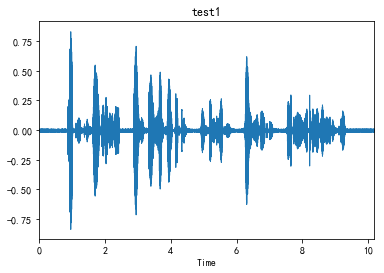

In [6]:
plt.figure()
librosa.display.waveplot(y1, sr1)
plt.title('test1')
plt.show()

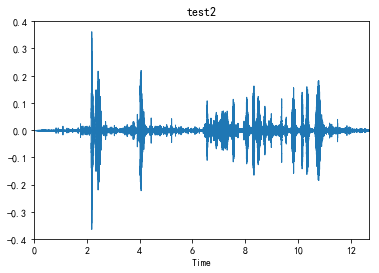

In [7]:
plt.figure()
librosa.display.waveplot(y2, sr2)
plt.title('test2')
plt.show()

显示音频频谱图

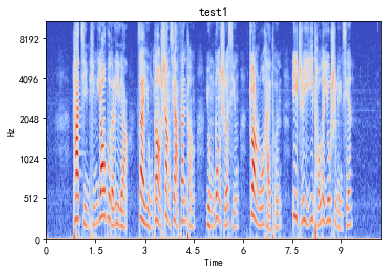

In [8]:
melspec1 = librosa.feature.melspectrogram(y1, sr1, n_fft=1024, hop_length=512, n_mels=128)
logmelspec1 = librosa.power_to_db(melspec1)
plt.figure()
librosa.display.specshow(logmelspec1, sr=sr1, x_axis='time', y_axis='mel')
plt.title('test1')
plt.show()

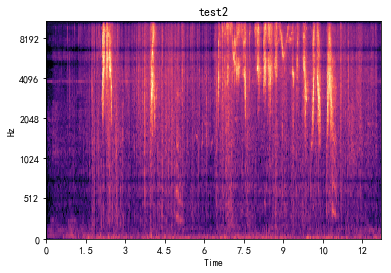

In [9]:
melspec2 = librosa.feature.melspectrogram(y2, sr2, n_fft=1024, hop_length=512, n_mels=128)
logmelspec2 = librosa.power_to_db(melspec2)
plt.figure()
librosa.display.specshow(logmelspec2, sr=sr2, x_axis='time', y_axis='mel')
plt.title('test2')
plt.show()

提取MFCC特征

In [10]:
mfcc1 = librosa.feature.mfcc(y=y1, sr=sr1)
mfcc2 = librosa.feature.mfcc(y=y2, sr=sr2)

print("test1 的 MFCC：", mfcc1)
print(mfcc1.shape)
print("test2 的 MFCC：", mfcc2)
print(mfcc2.shape)

test1 的 MFCC： [[-4.95988437e+02 -5.05147607e+02 -5.14900406e+02 ... -5.05147780e+02
  -5.15383727e+02 -5.26900504e+02]
 [ 4.69612383e+01  4.76198066e+01  4.36448418e+01 ...  2.42590096e+01
   2.34368069e+01  3.32601179e+01]
 [ 6.63757311e+00  5.37317474e+00  3.87170056e+00 ...  7.80046583e+00
   3.37550540e+00  6.52361552e+00]
 ...
 [ 1.12448024e+01  1.00868238e+01  5.21030986e+00 ...  6.51137989e+00
   6.42023382e+00  5.64207509e+00]
 [ 8.35918538e+00  8.70087201e+00  4.91722851e+00 ... -1.80603031e+00
   2.98696875e-01  3.47118457e+00]
 [ 2.46081892e+00  2.92839197e+00  7.10055989e+00 ...  2.25417952e+00
   1.24352005e+00  2.55906367e+00]]
(20, 319)
test2 的 MFCC： [[-7.54980265e+02 -7.08014776e+02 -6.62894931e+02 ... -5.34064862e+02
  -5.36352710e+02 -5.33487734e+02]
 [-2.30455875e+00  1.11016923e+01  2.10026881e+01 ...  5.14833889e+00
   5.83748665e+00  1.99595035e+00]
 [-4.75530206e+00 -1.60624388e+01 -2.61427714e+01 ... -9.42498286e+00
  -8.99282379e+00 -6.96443646e+00]
 ...
 [ 7.4

绘制 MFCC 特征图（进行缩放后）

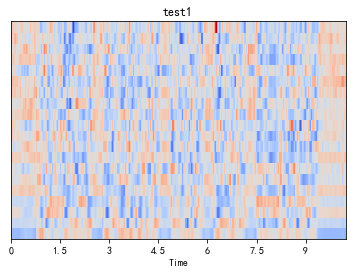

In [11]:
import sklearn
mfcc1 = sklearn.preprocessing.scale(mfcc1, axis=1)
plt.figure()
librosa.display.specshow(mfcc1, sr=sr1, x_axis='time')
plt.title('test1')
plt.show()

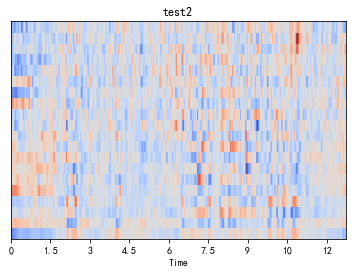

In [12]:
mfcc2 = sklearn.preprocessing.scale(mfcc2, axis=1)
plt.figure()
librosa.display.specshow(mfcc2, sr=sr2, x_axis='time')
plt.title('test2')
plt.show()